In [1]:
import pandas as pd
import keras
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import re

Using TensorFlow backend.


In [2]:
url = 'https://raw.githubusercontent.com/danielding186/StockPrediction/26bc55f963f3d660017e4921032fed54234f1164/Combined_News_DJIA.csv'
url1 = 'https://raw.githubusercontent.com/danielding186/StockPrediction/master/RedditNews.csv'

In [3]:
Newsdf=pd.read_csv(url)
#Newsdf1=pd.read_csv(url1)

In [4]:
print(Newsdf.shape)
#print(Newsdf1.shape)

(1989, 27)


In [55]:
Newsdf.tail()

Date  LabelNew                                               Top1  \
1984  6/27/16         1  Barclays and RBS shares suspended from trading...   
1985  6/28/16         0  2,500 Scientists To Australia: If You Want To ...   
1986  6/29/16         0                   Explosion At Airport In Istanbul   
1987  6/30/16         1  Jamaica proposes marijuana dispensers for tour...   
1988   7/1/16         1  A 117-year-old woman in Mexico City finally re...   

                                                   Top2  \
1984  Pope says Church should ask forgiveness from g...   
1985  The personal details of 112,000 French police ...   
1986  Yemeni former president: Terrorism is the offs...   
1987  Stephen Hawking says pollution and 'stupidity'...   
1988   IMF chief backs Athens as permanent Olympic host   

                                                   Top3  \
1984  Poland 'shocked' by xenophobic abuse of Poles ...   
1985  S&amp;P cuts United Kingdom sovereign credit r...   
1986  UK must accept freedom of movement to access E...   
1987  Boris Johnson says he will not run for Tory pa...   
1988  The president of France says if Brexit won, so...   

                                                   Top4  \
1984  There will be no second referendum, cabinet ag...   
1985                Huge helium deposit found in Africa   
1986  Devastated: scientists too late to captive bre...   
1987  Six gay men in Ivory Coast were abused and for...   
1988  British Man Who Must Give Police 24 Hours' Not...   

                                                   Top5  \
1984      Scotland welcome to join EU, Merkel ally says   
1985  CEO of the South African state broadcaster qui...   
1986  British Labor Party leader Jeremy Corbyn loses...   
1987  Switzerland denies citizenship to Muslim immig...   
1988  100+ Nobel laureates urge Greenpeace to stop o...   

                                                   Top6  \
1984  Sterling dips below Friday's 31-year low amid ...   
1985  Brexit cost investors $2 trillion, the worst o...   
1986  A Muslim Shop in the UK Was Just Firebombed Wh...   
1987  Palestinian terrorist stabs israeli teen girl ...   
1988  Brazil: Huge spike in number of police killing...   

                                                   Top7  \
1984  No negative news about South African President...   
1985  Hong Kong democracy activists call for return ...   
1986  Mexican Authorities Sexually Torture Women in ...   
1987  Puerto Rico will default on $1 billion of debt...   
1988  Austria's highest court annuls presidential el...   

                                                   Top8  \
1984  Surge in Hate Crimes in the U.K. Following U.K...   
1985  Brexit: Iceland president says UK can join 'tr...   
1986            UK shares and pound continue to recover   
1987  Republic of Ireland fans to be awarded medal f...   
1988  Facebook wins privacy case, can track any Belg...   

                            ...                          \
1984                        ...                           
1985                        ...                           
1986                        ...                           
1987                        ...                           
1988                        ...                           

                                                  Top17  \
1984  Boris Johnson says the UK will continue to "in...   
1985  There is increasing evidence that Australia is...   
1986  The land under Beijing is sinking by as much a...   
1987  Mounting evidence suggests 'hobbits' were wipe...   
1988  S&amp;P revises European Union credit rating t...   

                                                  Top18  \
1984  Richard Branson is calling on the UK governmen...   
1985  Richard Branson, the founder of Virgin Group, ...   
1986  Car bomb and Anti-Islamic attack on Mosque in ...   
1987  The men who carried out Tuesday's terror attac...   
1988  India gets $1 billion loan from World Bank f

In [56]:
#Newsdf.sort_values(by=['Date'],ascending=False)

In [259]:
#News=NewsNews.reset_index(drop=False)
#News.drop(['index'],axis=1)
Newsdf.head()


Date  LabelNew                                               Top1  \
1783  9/9/15         0  Sometimes, 7-8 men raped us in one daywe thoug...   
1531  9/9/14         1  New Report: World Leaders Call For Ending Crim...   
1279  9/9/13         0  Norway Has More Money Than It Knows What To Do...   
778   9/9/11         1  Turkish Prime Minister: Turkish navy will esco...   
525   9/9/10         0  Afghan insurgents give captive reporter a cell...   

                                                   Top2  \
1783  Japanese group sues to stop TPP talks - A grou...   
1531  Another victory for Kim Dotcom, he's getting a...   
1279  Obama's top aide: We lack 'irrefutable, beyond...   
778   Vancouver lawyer Gail Davidson seeks Dick Chen...   
525   Terrorism : Suicide attack in Russia kills 15,...   

                                                   Top3  \
1783  UK Parliament to debate "making the production...   
1531  ISIS Kidnaps 50 Civilians After They Burn Isla...   
1279  A 58-year-old Uruguayan man who disappeared fo...   
778   An 85-year-old World War II veteran who was ja...   
525   Olympic Disaster in Vancouver, Taxpayers on Ho...   

                                                   Top4  \
1783  Saudi Arabian diplomat accused of raping Nepal...   
1531  MH17 crash: Dutch experts say numerous objects...   
1279  Why Dubai's Islamic Austerity is a Sham, Coupl...   
778   Magnitude 6.7 Quake Hits Vancouver Island, Canada   
525              Anti-Israel boycotts are gaining speed   

                                                   Top5  \
1783  S. Korea dedicates $100 million to help poor c...   
1531  Russian agents raiding homes of Muslims in Crimea   
1279  Obama Administration Denies AP Requests For Sy...   
778   Nato-led forces killed BBC reporter in Afghani...   
525   What America Left Behind in Iraq - It's even u...   

                                                   Top6  \
1783  Indian police say they have rescued 2 Nepali w...   
1531  2,300 year old mysterious tomb discovered in A...   
1279  'Saddam used chemical weapons on Iran with no ...   
778   A U.S. military plane was forced down by a Nor...   
525   UK MPs 'were too scared to testify in court' a...   

                                                   Top7  \
1783  Hungarian nationalist TV camera operator filme...   
1531  Russia Reports Troop Deaths In Ukraine, But Ca...   
1279     Russia urges Assad to give up chemical weapons   
778   Food Emergency: How the World Bank &amp; IMF H...   
525   Merkel to honor Mohammed cartoonist at press a...   

                                                   Top8  \
1783  Frankenvirus Emerges From Siberia's Frozen Was...   
1531  Steven Sotloff Was Sold To ISIS By 'Moderate' ...   
1279  France strengthens separation of Church and St...   
778   Australopithecus sediba skeletons found at the...   
525                   How could this POSSIBLY go wrong?   

                            ...                          \
1783                        ...                           
1531                        ...                           
1279                        ...                           
778                         ...                           
525                         ...                           

                                                  Top16  \
1783        Germany promises 50 Mbps broadband for all.   
1531  6 Elephant Poachers Caught in Mozambique Reser...   
1279  Assad Tells PBS' Charlie Rose Syria Prepared t...   
778   Russia pins Soyuz failure to production line d...   
525   Creepy Biometric IDs to Be Forced Onto India's...   

                                                  Top17  \
1783  Australia to accept additional 12,000 Syrian r...   
1531  ISIS-Affiliated Twitter Account Calls For Assa...   
1279  The U.S. government tapped into computer netwo...   
778   Anti-Israel sentiment high in Egypt: But now, ...   
525   \rRomania attempts to tax witches and fortune ...

In [252]:
#Newsdf.reset_index(drop=True,inplace=True)
#Newsdf

Date  LabelNew                                               Top1  \
0      9/9/15         0  Sometimes, 7-8 men raped us in one daywe thoug...   
1      9/9/14         1  New Report: World Leaders Call For Ending Crim...   
2      9/9/13         0  Norway Has More Money Than It Knows What To Do...   
3      9/9/11         1  Turkish Prime Minister: Turkish navy will esco...   
4      9/9/10         0  Afghan insurgents give captive reporter a cell...   
5      9/9/09         0  b'British nurse who was struck off the registe...   
6      9/9/08         1  b'I love the world: Thai Prime Minister Samak ...   
7      9/8/15         0  Homeopathy conference in Germany ends in chaos...   
8      9/8/14         1  A Chinese boy has made the discovery of lifeti...   
9      9/8/11         1  The lifetime ban on blood donations by homosex...   
10     9/8/10         0  "For them, there is no safe place. They are ra...   
11     9/8/09         0  b'Israel\'s army is changing. Once proudly sec...   
12     9/8/08         0  b'A French judge has ordered two branches of S...   
13     9/7/12         0  Afghan actress stabbed to death by male mob fo...   
14     9/7/11         0  WikiLeaks: Every law proposal, every ordinance...   
15     9/7/10         0  Two redditors are climbing Mt. Kilimanjaro for...   
16     9/6/13         0  New documentary shows how televangelist Pat Ro...   
17     9/6/12         0  Evangelical Christian doctor in Australia bann...   
18     9/6/11         0           Turkish PM suspends all ties with Israel   
19     9/5/14         0  After convincing China to give up shark fin so...   
20     9/5/13         0  36 hours before the Australian election and in...   
21     9/5/12         1  'I couldn't believe CNN was making me put what...   
22     9/5/08         1  b'In Jordan, the honor killings that are not: ...   
23     9/4/15         1  Jordan has a population of 6 million, but have...   
24     9/4/14         0  Russia warns NATO not to offer membership to U...   
25     9/4/13         0  All major commercial TV networks in Australia ...   
26     9/4/12         1  A virus that eats cancer, Cheap to \rproduce, ...   
27     9/4/09         0  b'A six-year-old girl has become a media darli...   
28     9/4/08         1  b'Security guards beat man at soccer (football...   
29    9/30/15         0  Germany has translated the first 20 articles o...   
...       ...       ...                                                ...   
1959  1/15/09         0  b'Vatican reveals list of worst sins. Desecrat...   
1960  1/14/16         1  No. of crimes in Japan falls to postwar low in...   
1961  1/14/15         1        Cameroon Army Kills 143 Boko Haram Fighters   
1962  1/14/14         1  Mozilla Calls On World To Protect Firefox Brow...   
1963  1/14/13         0  German govt  unexpectedly offers Paris concret...   
1964  1/14/11         0  Haiti reconstruction firms only get $1.60 for ...   
1965  1/14/10         1  b'"It never ceases to amaze me that in times o...   
1966  1/14/09         1  b"UN headquarters in Gaza hit by Israeli 'whit...   
1967  1/13/16         1  Explosions heard in Indonesian capital - in Ja...   
1968  1/13/15         1  China has just banned the burqa in its biggest...   
1969  1/13/14         1  A broad coalition of well-known organizations ...   
1970  1/13/12         1  Scotland Yard Report Finds British Citizen Was...   
1971  1/13/11         0  Aussie here: Just want everyone to know that B...   
1972  1/13/10         0  b'Please go to www.redcross.org and donate at ...   
1973  1/13/09         1       b'Greece hinders US arms delivery to Israel'   
1974  1/12/16         0  Oil Falls Below $30/Barrel for First Time Sinc...   
1975  1/12/15         1  World's largest indoor farm in Japan is 100 ti...   
1976  1/12/12         1  Loggers in Brazil captured an eight-year-old g...   
1977  1/12/11         1  West African farmers have succeeded in cutting...   
1978  1/12/10         1  b'Dear

In [6]:
#checking for null values
Newsdf.isnull().sum()

Date        0
LabelNew    0
Top1        0
Top2        0
Top3        0
Top4        0
Top5        0
Top6        0
Top7        0
Top8        0
Top9        0
Top10       0
Top11       0
Top12       0
Top13       0
Top14       0
Top15       0
Top16       0
Top17       0
Top18       0
Top19       0
Top20       0
Top21       0
Top22       0
Top23       1
Top24       3
Top25       3
dtype: int64

In [4]:
Newsdf[Newsdf.isnull().any(axis=1)]

Date  LabelNew                                               Top1  \
277   9/15/09         1  b'The Church of Scientology won\'t be dissolve...   
348  12/24/09         0  b'Woman knocks down Pope Benedict at Christmas...   
681   4/21/11         0  Director of "Restrepo" and Photographer Chris ...   

                                                  Top2  \
277  b'New virus from rats can kill 80 per cent of ...   
348  b'Ugandan President Museveni says he will bloc...   
681  Everyone within 20km of Fukushima will be forc...   

                                                  Top3  \
277  b'The gruesome spectacle of dolphins being sla...   
348  b"Venezuela's Chavez threatens to kick out car...   
681  Bahrain: Activist Zaynab Al-Khawaja's letter t...   

                                                  Top4  \
277  b'The End of Innocence in Afghanistan: \'The G...   
348  b'Woman who knocked down pope had pasta in her...   
681  More than 80,000 people are claiming incapacit...   

                                                  Top5  \
277            b'France approves Internet piracy bill'   
348  b'450 people from 21 countries, including 30 f...   
681  Libya: 'mission creep' claims as UK sends in m...   

                                                  Top6  \
277  b'The Rural Doctors Association says right now...   
348  b'Chvez declares Angel Falls is no more: World...   
681  Japan considers banning access to evacuation zone   

                                                  Top7  \
277  b'Al Jazeera English - Africa - Shabab to aven...   
348             b'Drug tests catch out 10 police (UK)'   
681  Chinese oil giant Sinopec has stopped exportin...   

                                                  Top8  ...   \
277  b"How Sri Lanka governs through detentions - S...  ...    
348  b'Once the worlds fourth-largest lake, the Ara...  ...    
681  6.0-magnitude earthquake strikes off east coas...  ...    

                                                 Top16  \
277  b'In an equine echo of the controversy surroun...   
348  b'Pig farts spark Australia gas scare - I shit...   
681  Russian migration official fired in racism row...   

                                                 Top17  \
277  b'UPDATE: 5-New York homes raided in terrorism...   
348  b'Bin Laden daughter flees to Saudi embassy in...   
681  Small amounts of radioactive iodine found in b...   

                                                 Top18  \
277  b'Population Growth Impeding Progress on the M...   
348  b'Traumatic Brain Injuries:  Growing evidence ...   
681  War photographer, Oscar-nominated film directo...   

                                                 Top19  \
277    b'Global Population to Reach 7 Billion by 2011'   
348  b'The Pakistan Supreme Court has ordered the P...   
681  Effeminate boys are being sent to a special ca...   

                                                 Top20  \
277                b'Government Funded Feminist Porn '   
348  b"Here's a video the Taliban released this mor...   
681  Japan Government Declares 12-Mile Area Around ...   

                                                 Top21  \
277  b'Can someone enlighten me re:Holy Land disput...   
348               b'Fireworks set off aboard airliner'   
681  TEPCO admitted Wednesday that nuclear fuel in ...   

                                                 Top22  \
277  b'Human Rights Watch official suspended for co...   
348  b'Five VA men may face terrorism charges, Paki...   
681  Fukushima evacuees face arrest if they return ...   

                                                 Top23 Top24 Top25  
277                                                NaN   NaN   NaN  
348  b"Ayatollah Montazeri's Legacy:  In death he m...   NaN   NaN  
681          Prince Charles wins some kind of a record   NaN   NaN  

[3 rows x 27 columns]

In [5]:
Newsdf=Newsdf.dropna(axis = 0, how ='any')

In [106]:
Newsdf.isnull().sum()

Date        0
LabelNew    0
Top1        0
Top2        0
Top3        0
Top4        0
Top5        0
Top6        0
Top7        0
Top8        0
Top9        0
Top10       0
Top11       0
Top12       0
Top13       0
Top14       0
Top15       0
Top16       0
Top17       0
Top18       0
Top19       0
Top20       0
Top21       0
Top22       0
Top23       0
Top24       0
Top25       0
dtype: int64

In [6]:
Newsdf['FullNews'] = Newsdf[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25']].apply(lambda x: ' '.join(x), axis = 1)
                            
                            

In [7]:
#Top 25 headlines per day 
NewsFull=Newsdf.drop(['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)
NewsFull
             

Date  LabelNew                                           FullNews
0      8/8/08         0  b"Georgia 'downs two Russian warplanes' as cou...
1     8/11/08         0  b'Why wont America and Nato help us? If they w...
2     8/12/08         0  b'Remember that adorable 9-year-old who sang a...
3     8/13/08         1  b' U.S. refuses Israel weapons to attack Iran:...
4     8/14/08         0  b'All the experts admit that we should legalis...
5     8/15/08         0  b"Mom of missing gay man: Too bad he's not a 2...
6     8/18/08         1  b'In an Afghan prison, the majority of female ...
7     8/19/08         1  b"Man arrested and locked up for five hours af...
8     8/20/08         1  b'Two elderly Chinese women have been sentence...
9     8/21/08         0  b"British resident held in Guantanamo Bay wins...
10    8/22/08         0  b'Syria says its ready to put a Russian missil...
11    8/25/08         1  b"N Korea's Kim died in 2003; replaced by look...
12    8/26/08         1  b'North Korea halts denuclearisation after US ...
13    8/27/08         1  b'Photos of a 15-year-old Iraqi suicide bomber...
14    8/28/08         0  b"Military help for Georgia is a 'declaration ...
15    8/29/08         1  b'Russian Prime Minister Vladimir Putin has ac...
16     9/2/08         1  b"A girl filmed Israeli soldiers' brutality. S...
17     9/3/08         1  b'Poland Legalization of Marijuana - two majou...
18     9/4/08         1  b'Security guards beat man at soccer (football...
19     9/5/08         1  b'In Jordan, the honor killings that are not: ...
20     9/8/08         0  b'A French judge has ordered two branches of S...
21     9/9/08         1  b'I love the world: Thai Prime Minister Samak ...
22    9/10/08         1  b'Dutch to ban burkas when picking children up...
23    9/11/08         1  b'American intelligence confirms that the late...
24    9/12/08         0  b"OPEC finished??  Saudi Arabia says 'LATER!'"...
25    9/15/08         1  b'Did Saakashvili Lie?: The West Begins to Dou...
26    9/16/08         0  b"Pakistani Tribesmen Representing Half A Mill...
27    9/17/08         1  b'Attack on US embassy in Yemen leaves 16 dead...
28    9/18/08         1  b'6,200 babies sick: Milk scandal spreading ' ...
29    9/19/08         0  b'Brits take a stand - ban short-selling of fi...
...       ...       ...                                                ...
1959  5/20/16         0  LinkedIn just revealed that the 2012 breach th...
1960  5/23/16         1  'It keeps happening,' rape survivor says: Prot...
1961  5/24/16         1  Colombia has fired more than 1000 police offic...
1962  5/25/16         0  Adidas shoe manufacture returns to Germany, fu...
1963  5/26/16         0  Greek news sites are reporting that Aristotle'...
1964  5/27/16         0  Thailand has shut down 10 popular diving sites...
1965  5/31/16         0  Every reference to the Great Barrier Reef remo...
1966   6/1/16         0  Forty tiger cub bodies have been found in a fr...
1967   6/2/16         0  Germany recognizes the Armenian Genocide Media...
1968   6/3/16         0  A seven-year-old boy who went missing in bear-...
1969   6/6/16         1  Nearly 60% of Qatar population live in 'labour...
1970   6/7/16         1  Five Men in India Have Been Convicted for the ...
1971   6/8/16         1  UN Removes Saudi Arabia From Human Rights Blac...
1972   6/9/16         0  Vandals Destroy 8,000-Yr-Old Aboriginal Artwor...
1973  6/10/16         1  U.N. Chief Admits He Removed Saudi Arabia From...
1974  6/13/16         1  A Dutch woman who alleged she was raped after ...
1975  6/14/16         0  Gay Chinese man sues mental hospital for tryin...
1976  6/15/16         0  ISIS Twitter accounts have been hijacked with ...
1977  6/16/16         1  Decriminalisation Call As 'War On Drugs' Fails...
1978  6/17/16         1  MP Jo Cox dead after shooting attack Saudi Ara...
1979  6/20/16         1  A staggering 87 percent of Venezuelans say the...
1980  6/21/16         0  An Austra

In [109]:
NewsFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1988
Data columns (total 3 columns):
Date        1986 non-null object
LabelNew    1986 non-null int64
FullNews    1986 non-null object
dtypes: int64(1), object(2)
memory usage: 62.1+ KB


In [20]:
#cleaning data 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

NewsFull.FullNews= NewsFull.FullNews.apply(lambda x: x.lower())
from nltk.corpus import stopwords
stop = stopwords.words('english')
NewsFull.FullNews.apply(lambda x: [item for item in x if item not in stop])

NewsFull["tokens"] = NewsFull["FullNews"].apply(tokenizer.tokenize)

NewsFull.head()

Date  LabelNew                                           FullNews  \
0   8/8/08         0  b"georgia 'downs two russian warplanes' as cou...   
1  8/11/08         0  b'why wont america and nato help us? if they w...   
2  8/12/08         0  b'remember that adorable 9-year-old who sang a...   
3  8/13/08         1  b' u.s. refuses israel weapons to attack iran:...   
4  8/14/08         0  b'all the experts admit that we should legalis...   

                                              tokens  
0  [b, georgia, downs, two, russian, warplanes, a...  
1  [b, why, wont, america, and, nato, help, us, i...  
2  [b, remember, that, adorable, 9, year, old, wh...  
3  [b, u, s, refuses, israel, weapons, to, attack...  
4  [b, all, the, experts, admit, that, we, should...

In [14]:
#inspecting data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in NewsFull["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in NewsFull["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

910512 words total, with a vocabulary size of 34719
Max sentence length is 759


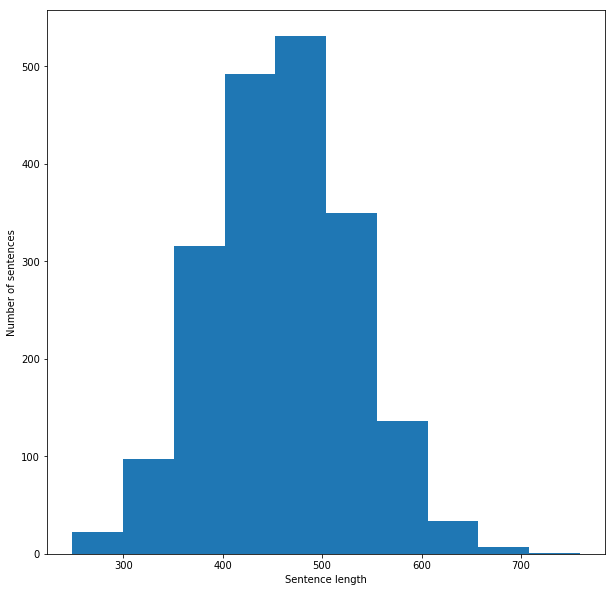

In [15]:
#visualizing above

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [110]:
word_count = NewsFull['FullNews'].apply(lambda x: len(str(x).split(" ")))
word_count

0       377
1       273
2       354
3       315
4       279
5       341
6       256
7       276
8       326
9       323
10      319
11      279
12      269
13      276
14      230
15      272
16      340
17      282
18      306
19      325
20      309
21      343
22      253
23      246
24      345
25      310
26      347
27      241
28      289
29      250
       ... 
1959    387
1960    432
1961    541
1962    458
1963    403
1964    606
1965    484
1966    538
1967    443
1968    459
1969    438
1970    420
1971    472
1972    494
1973    545
1974    382
1975    399
1976    429
1977    550
1978    367
1979    547
1980    541
1981    518
1982    408
1983    395
1984    395
1985    450
1986    404
1987    466
1988    527
Name: FullNews, Length: 1986, dtype: int64

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stopword = NewsFull['FullNews'].apply(lambda x: ([x for x in x.split() if x in stop]))
stopword

0       [as, to, of, to, be, of, into, from, are, the,...
1       [and, they, why, did, we, them, in, down, on, ...
2       [that, who, at, the, was, we, had, no, we, hav...
3       [to, the, to, of, we, then, we, were, he, didn...
4       [the, that, we, should, in, by, a, in, the, in...
5       [of, not, a, then, be, for, has, been, of, tha...
6       [an, the, of, are, for, being, of, you're, not...
7       [and, up, for, after, of, is, the, that, will,...
8       [have, been, to, a, of, through, after, they, ...
9       [in, to, to, have, this, to, you've, what, was...
10      [its, to, a, on, its, as, a, to, to, a, in, an...
11      [in, by, on, an, to, is, will, a, out, of, to,...
12      [after, to, them, from, of, in, in, has, to, t...
13      [of, a, who, herself, up, by, to, over, to, th...
14      [for, is, a, of, on, the, should, with, on, to...
15      [has, the, of, the, in, for, a, of, in, has, t...
16      [her, has, been, the, of, have, a, from, a, to...
17      [of, i

In [9]:
#removing punctuations
NewsFull['FullNews']=NewsFull['FullNews'].str.replace('[^\w\s]','')
NewsFull['FullNews'].head()

0    bGeorgia downs two Russian warplanes as countr...
1    bWhy wont America and Nato help us If they won...
2    bRemember that adorable 9yearold who sang at t...
3    b US refuses Israel weapons to attack Iran rep...
4    bAll the experts admit that we should legalise...
Name: FullNews, dtype: object

In [10]:
#converting into lower
NewsFull['FullNews'] = NewsFull['FullNews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
NewsFull['FullNews'].head()

0    bgeorgia downs two russian warplanes as countr...
1    bwhy wont america and nato help us if they won...
2    bremember that adorable 9yearold who sang at t...
3    b us refuses israel weapons to attack iran rep...
4    ball the experts admit that we should legalise...
Name: FullNews, dtype: object

In [11]:
#removing stopwords
NewsFull['FullNews'] = NewsFull['FullNews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
NewsFull['FullNews'].head()

0    bgeorgia downs two russian warplanes countries...
1    bwhy wont america nato help us wont help us he...
2    bremember adorable 9yearold sang opening cerem...
3    b us refuses israel weapons attack iran report...
4    ball experts admit legalise drugs bwar south o...
Name: FullNews, dtype: object

In [115]:
#checking highest occuring words
freq = pd.Series(' '.join(NewsFull['FullNews']).split()).value_counts()[:10]
freq

us            4195
says          2558
new           2349
government    1922
police        1896
people        1824
world         1710
china         1665
israel        1642
years         1579
dtype: int64

In [116]:
#rare words
freq = pd.Series(' '.join(NewsFull['FullNews']).split()).value_counts()[-10:]
freq

bigoted               1
ns                    1
notebook              1
minutebyminute        1
christianpopulated    1
btexan                1
conde                 1
bloodbrain            1
rapecondoning         1
sideways              1
dtype: int64

In [12]:
#spelling correction
from textblob import TextBlob
#NewsFull['FullNews'].apply(lambda x: str(TextBlob(x).correct()))
#NewsFull['FullNews'].head()

In [13]:
#splitting words
def word_coverter(text):
    try:
        return TextBlob(text).words
    except:
        return None

NewsFull['FullNews']  = NewsFull['FullNews'] .apply(word_coverter)

In [126]:
NewsFull['FullNews'].head()

0    [bgeorgia, downs, two, russian, warplanes, cou...
1    [bwhy, wont, america, nato, help, us, wont, he...
2    [bremember, adorable, 9yearold, sang, opening,...
3    [b, us, refuses, israel, weapons, attack, iran...
4    [ball, experts, admit, legalise, drugs, bwar, ...
Name: FullNews, dtype: object

In [14]:
#stemming words
from nltk.stem import PorterStemmer
st = PorterStemmer()
NewsFull['FullNews'].apply(lambda x: " ".join([st.stem(word) for word in x]))
NewsFull['FullNews'].head()

0    [bgeorgia, downs, two, russian, warplanes, cou...
1    [bwhy, wont, america, nato, help, us, wont, he...
2    [bremember, adorable, 9yearold, sang, opening,...
3    [b, us, refuses, israel, weapons, attack, iran...
4    [ball, experts, admit, legalise, drugs, bwar, ...
Name: FullNews, dtype: object

In [15]:
#lemmatizing words
from textblob import Word
NewsFull['FullNews'] = NewsFull['FullNews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
NewsFull['FullNews'].head()

0    bgeorgia down two russian warplane country mov...
1    bwhy wont america nato help u wont help u help...
2    bremember adorable 9yearold sang opening cerem...
3    b u refuse israel weapon attack iran report bw...
4    ball expert admit legalise drug bwar south ose...
Name: FullNews, dtype: object

In [44]:
NewsFull['Sentiment'] = NewsFull['FullNews'].apply(lambda x: TextBlob(x).sentiment[0] )
NewsFull.head()

Date  LabelNew                                           FullNews  \
0   8/8/08         0  bgeorgia down two russian warplane country mov...   
1  8/11/08         0  bwhy wont america nato help u wont help u help...   
2  8/12/08         0  bremember adorable 9yearold sang opening cerem...   
3  8/13/08         1  b u refuse israel weapon attack iran report bw...   
4  8/14/08         0  ball expert admit legalise drug bwar south ose...   

   Sentiment  
0  -0.049365  
1   0.079866  
2  -0.036307  
3   0.016061  
4   0.024498

In [16]:
#term frequency and inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))
train_vect = tfidf.fit_transform(NewsFull['FullNews'])


In [19]:
train_vect

<1986x38355 sparse matrix of type '<class 'numpy.float64'>'
	with 507777 stored elements in Compressed Sparse Row format>

In [25]:
Vocabulary = ['mumbai',
 'aged',
 'flight',
 'buying',
 'danger',
 'economist',
 'separatist',
 'refugee',
 'hand',
 'northern',
 'school',
 'book',
 'hamas',
 'bush',
 'president',
 'day',
 'risk',
 'armed',
 'data',
 'australian']

In [22]:
Vocabulary=['track',
 'ill',
 'case',
 'send',
 'convicted',
 'minister',
 'libya',
 'approves',
 'seek',
 'sea',
 'failure',
 'scandal',
 'shift',
 'sentence',
 'kid',
 'atheist',
 'bill',
 'supreme',
 'rally',
 'base']

In [26]:
def cv(data):
    count_vectorizer = CountVectorizer(vocabulary=Vocabulary)
    emb = count_vectorizer.fit_transform(data)
    return emb

list_corpus = NewsFull['FullNews']
X_counts = cv(list_corpus)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
X_counts.shape

(1986, 20)

In [24]:
X1_counts.shape

(1986, 20)

# Bag of Words Counts #

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb

list_corpus = NewsFull['FullNews']
list_labels = NewsFull['LabelNew']
X_counts = cv(list_corpus)
#Y_counts =cv(list_labels)

X_train, X_test, y_train, y_test = train_test_split(train_vect, list_labels, test_size=0.2, 
                                                                                random_state=40)



In [33]:
#count_vectorizer.vocabulary_

In [34]:
#count_vectorizer.get_stop_words()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1588, 38355)
(398, 38355)
(1588,)
(398,)


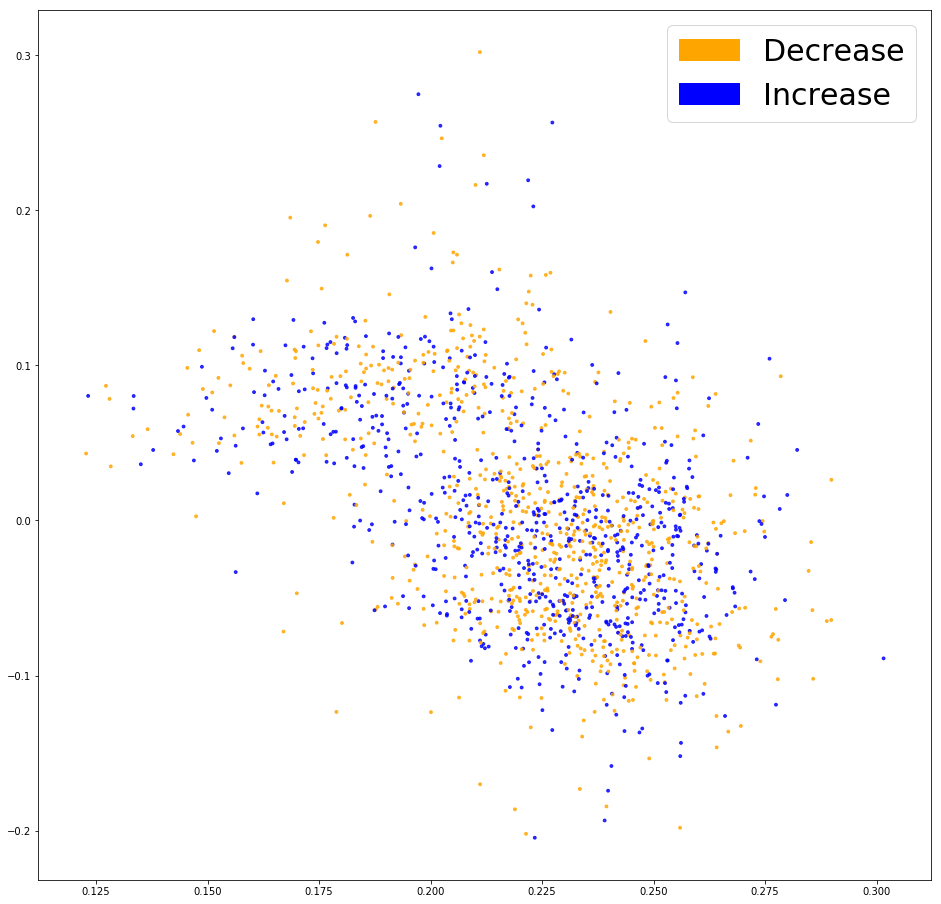

In [35]:
#visualizing
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Decrease')
            green_patch = mpatches.Patch(color='blue', label='Increase')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train, y_train)
plt.show()


These embeddings don't look very cleanly separated. Let's see if we can still fit a useful model on them.

Fitting a classifier
Starting with a logistic regression is a good idea. It is simple, often gets the job done, and is easy to interpret.

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

Evaluation
Let's start by looking at some metrics to see if our classifier performed well at all.

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.528, precision = 0.527, recall = 0.528, f1 = 0.526



Inspection
A metric is one thing, but in order to make an actionnable decision, we need to actually inspect the kind of mistakes our classifier is making. Let's start by looking at the confusion matrix.

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

print(cm)

[[119  87]
 [101  91]]


In [72]:
#try 
index_to_word = {v:k for k,v in count_vectorizer.vocabulary_.items()}
clf.coef_.shape
len(count_vectorizer.vocabulary_.items())

In [39]:
def get_most_important_features(vectorizer, model, n):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(tfidf, clf, 20)

In [40]:
importance

{0: {'tops': [(1.8446411601213657, 'track'),
   (1.8945822150423706, 'ill'),
   (1.900039788532943, 'case'),
   (1.9067560987286993, 'send'),
   (1.918313047237725, 'convicted'),
   (1.9534470619028137, 'minister'),
   (1.9564921385989307, 'libya'),
   (1.977394448383271, 'approves'),
   (1.9858766421076801, 'seek'),
   (2.0177032178563383, 'sea'),
   (2.0679363024195903, 'failure'),
   (2.074637713502173, 'scandal'),
   (2.0758889247015038, 'shift'),
   (2.131698072274124, 'sentence'),
   (2.1804616742135234, 'kid'),
   (2.189830624078931, 'atheist'),
   (2.20451904501893, 'bill'),
   (2.2563085951403914, 'supreme'),
   (2.30375134527471, 'rally'),
   (2.745833431851392, 'base')],
  'bottom': [(-1.6684226074112702, 'bmumbai'),
   (-1.6696649599480906, 'aged'),
   (-1.681139522556484, 'flight'),
   (-1.6834449652948924, 'buying'),
   (-1.696697865413986, 'danger'),
   (-1.701058155291265, 'economist'),
   (-1.7280157266595546, 'separatist'),
   (-1.7756381228254043, 'refugee'),
   (-1.

In [41]:
import numpy as np

In [42]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
  
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Decrease', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Increase', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()



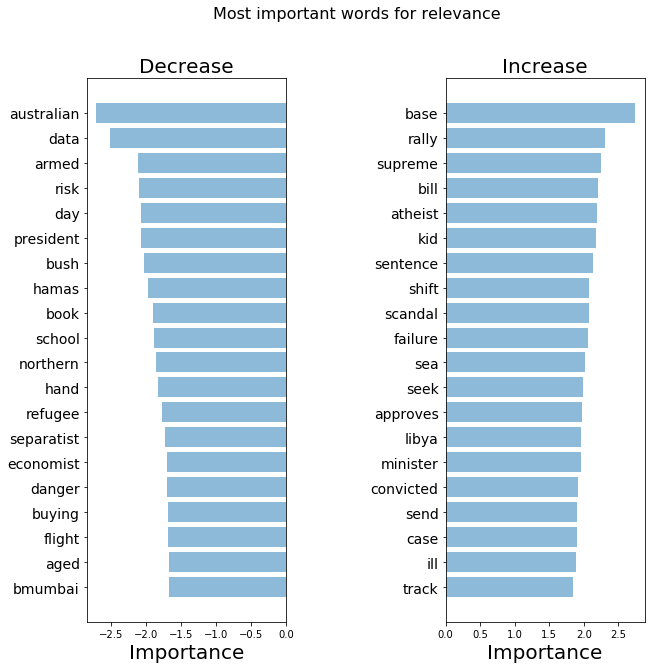

In [43]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [49]:
top_words
#bottom_words

['track',
 'ill',
 'case',
 'send',
 'convicted',
 'minister',
 'libya',
 'approves',
 'seek',
 'sea',
 'failure',
 'scandal',
 'shift',
 'sentence',
 'kid',
 'atheist',
 'bill',
 'supreme',
 'rally',
 'base']

# TFID

TFIDF Bag of Words
Let's try a slightly more subtle approach. On top of our bag of words model, we use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [316]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

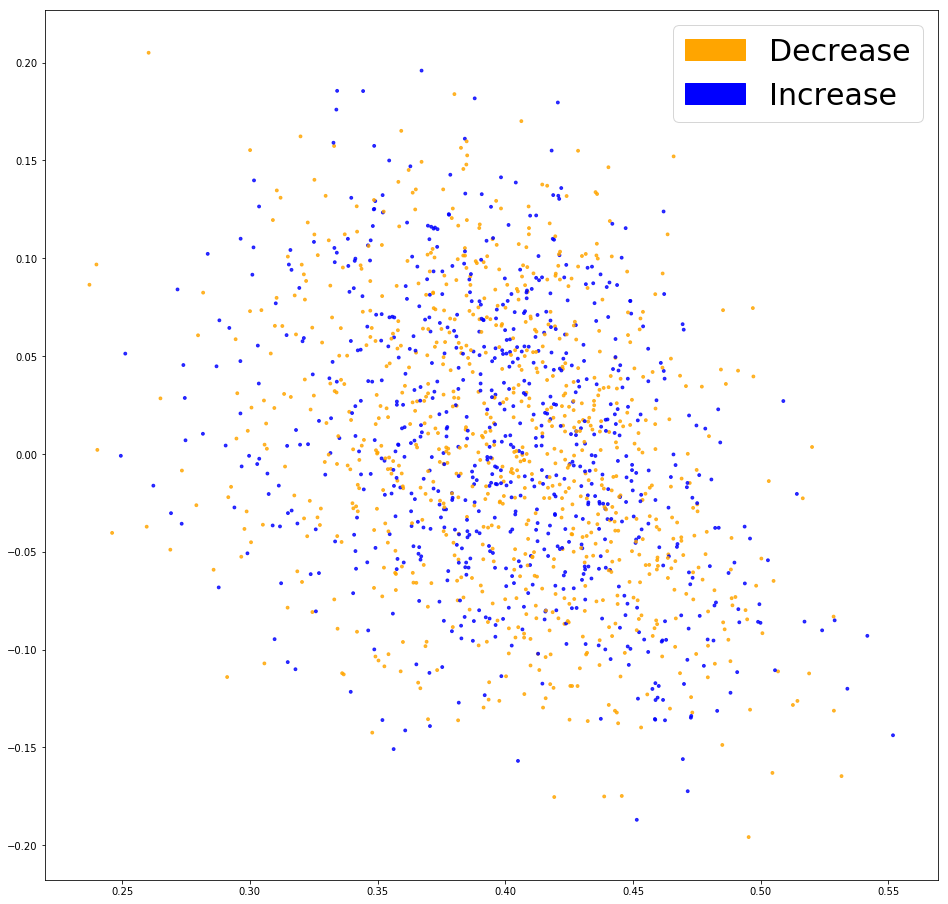

In [317]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [318]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [319]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.508, precision = 0.505, recall = 0.508, f1 = 0.504


In [320]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
print(cm)

[[117  89]
 [109  83]]


Slight improvement

In [321]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

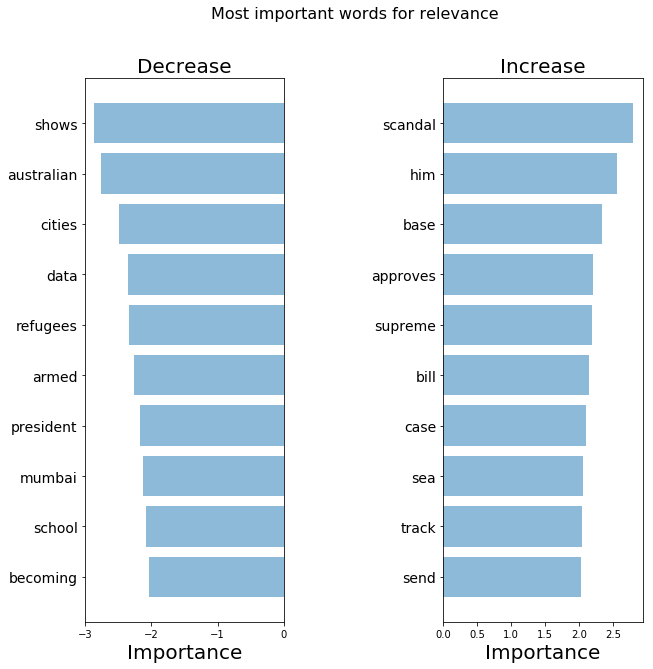

In [322]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

We can see a slightly increase in words that cause decrease in stock.


# Semantic Meaning
Word2vec is a model that was pre-trained on a very large corpus, and provides embeddings that map words that are similar close to each other. A quick way to get a sentence embedding for our classifier, is to average word2vec scores of all words in our sentence.

In [30]:
import gensim


word2vec_path = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

#from gensim import models

#w = models.KeyedVectors.load_word2vec_format(
   # '../GoogleNews-vectors-negative300.bin', binary=True)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [31]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = NewsFull['FullNews'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [32]:
embeddings = get_word2vec_embeddings(word2vec, NewsFull)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)


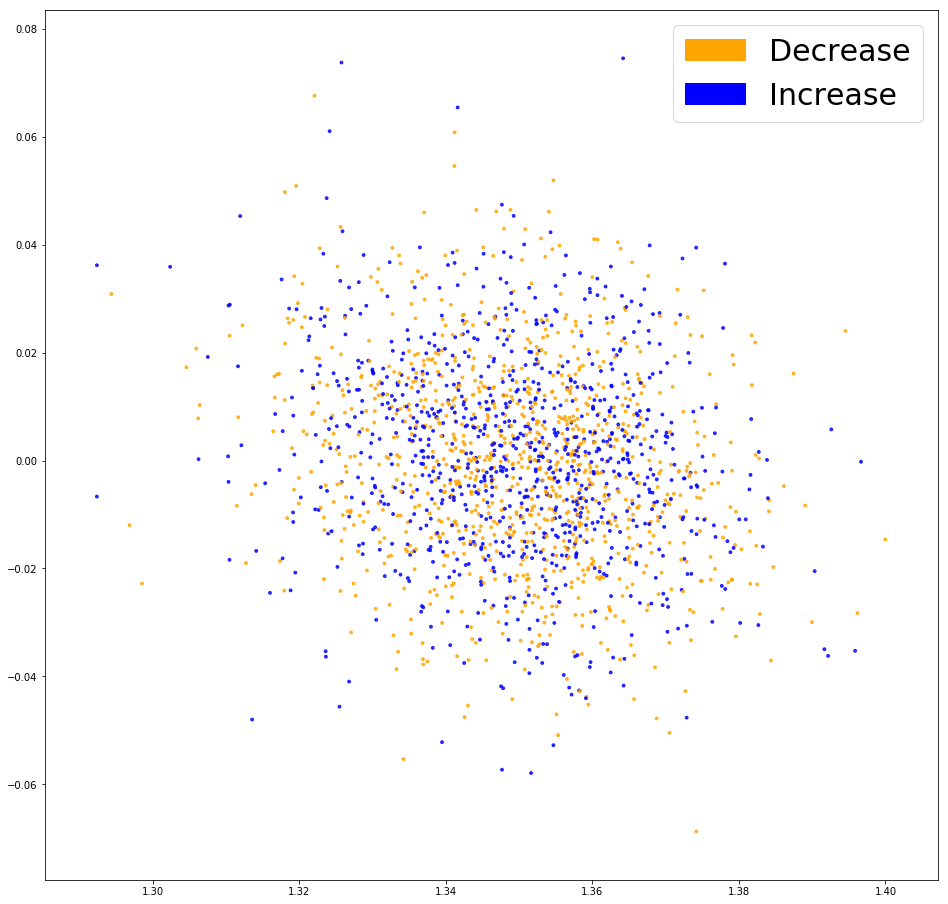

In [42]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()


In [34]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [35]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.467, precision = 0.468, recall = 0.467, f1 = 0.467


In [36]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
print(cm_w2v)

[[ 93 113]
 [ 99  93]]


In [44]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(tfidf, clf)

In [45]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["Decrease","Increase", "unknown"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [192]:
visualize_one_exp(X_test_data, y_test_data, 1)

Index: 1
True class: Decrease


In [195]:
visualize_one_exp(X_test_data, y_test_data, 0)

Index: 0
True class: Decrease


In [207]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Decrease',
    1: 'Increase'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

TypeError: Population must be a sequence or set.  For dicts, use list(d).

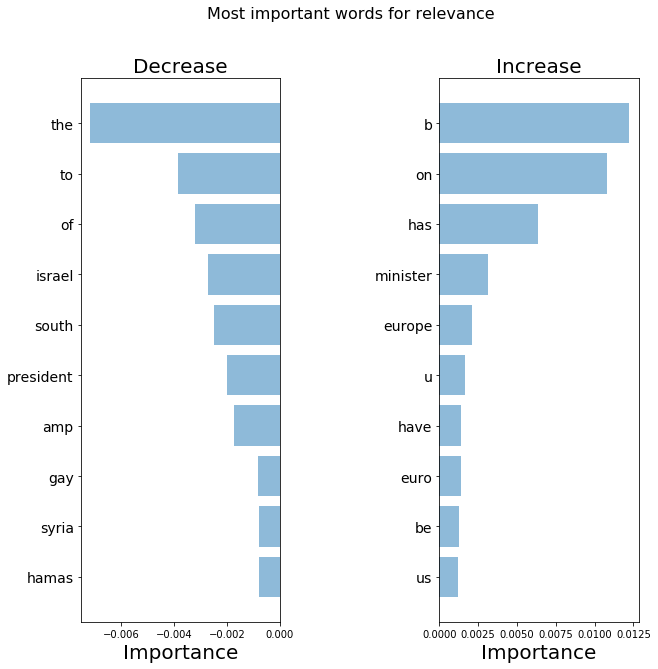

In [334]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Increase']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Increase']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Increase']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Increase']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

# CNN

In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(NewsFull["FullNews"].tolist())
sequences = tokenizer.texts_to_sequences(NewsFull["FullNews"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(NewsFull["LabelNew"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

NameError: name 'VOCAB' is not defined

In [39]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Concatenate
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    #convs = []
   # filter_sizes = [3,4,5]
    

    #for filter_size in filter_sizes:
    conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool1 = MaxPooling1D(pool_size=3)(conv1)
  

    
   
        # Original Yoon Kim model
    x = Dropout(0.5)(pool1)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [49]:
x_train = NewsFull['FullNews'][:1588]
y_train = NewsFull['LabelNew'][:1588]
x_val = NewsFull['FullNews'][398:]
y_val = NewsFull['LabelNew'][-398:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(NewsFull["LabelNew"].unique())), False)

NameError: name 'embedding_weights' is not defined

In [1]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

NameError: name 'model' is not defined

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [3]:
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

In [30]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(38355, 1000, input_length=38355))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 1, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=1))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])
    return model_conv
#model_conv = create_conv_model()
#model_conv.fit(data, np.array(labels), validation_split=0.4, epochs = 3)

In [31]:
model_conv = create_conv_model()
model_conv.fit(train_vect, np.array(NewsFull['LabelNew']), validation_split=0.4, epochs = 3,batch_size=500)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1191 samples, validate on 795 samples
Epoch 1/3


ResourceExhaustedError: OOM when allocating tensor with shape[500,38355,1000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node embedding_1/embedding_lookup}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


# Stock Price

In [79]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

def getStockData():
    tickers = []

    tickers.append('AMZN')

    # indexs
    tickers.extend(['^DJI', '^GSPC', '^NDX'])
    
    # Treasury Yield
    tickers.extend(['^IRX', '^FVX', '^TNX', '^TYX'])

    # other companies
    tickers.extend(['AAPL', 'FB', 'GOOG', 'NFLX', 'EBAY', 'CRM', 'MSFT', 'WMT'])
    
    
    # other countries index
    tickers.extend(['000001.SS', '^HSI', '^N225', '^FCHI', '^GDAXI',  '^BSESN'])

    start_date = '2008-8-8'
    end_date = '2016-7-1'

    frames = []
    for ticker in tickers:
        stock_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
        stock_data = stock_data.rename(lambda s: (s.lower() + '-' + ticker).replace(' ', '-'), axis='columns')
        frames.append(stock_data)

    df_final = reduce(lambda left,right: left.join(right), frames)
    
    df_final.to_csv()
    
    return stockData.csv
    
#getStockData()

In [80]:
getStockData()

NameError: name 'stockData' is not defined

In [28]:
df=pd.read_csv('/Users/anithakanna/Desktop/stockData.csv')

In [ ]:
277 348 681 

In [83]:
df.head()

Date  high-AMZN   low-AMZN  open-AMZN  close-AMZN  volume-AMZN  \
0  2008-08-08  81.209999  76.290001  76.779999   80.510002      9162700   
1  2008-08-11  91.750000  79.779999  80.180000   88.089996     25070200   
2  2008-08-12  88.480003  86.099998  87.320000   87.250000      8026500   
3  2008-08-13  88.250000  84.540001  86.279999   86.690002      7208800   
4  2008-08-14  88.750000  85.220001  85.709999   88.029999      6901700   

   adj-close-AMZN     high-^DJI      low-^DJI     open-^DJI        ...         \
0       80.510002  11759.959961  11388.040039  11432.089844        ...          
1       88.089996  11867.110352  11675.530273  11729.669922        ...          
2       87.250000  11782.349609  11601.519531  11781.700195        ...          
3       86.690002  11633.780273  11453.339844  11632.809570        ...          
4       88.029999  11718.280273  11450.889648  11532.070312        ...          

   open-^GDAXI  close-^GDAXI  volume-^GDAXI  adj-close-^GDAXI   high-^BSESN  \
0  6537.540039   6561.649902    144950800.0       6561.649902  15228.820312   
1  6570.520020   6609.629883    123059300.0       6609.629883  15520.709961   
2  6601.700195   6585.870117    121877700.0       6585.870117  15579.780273   
3  6562.970215   6422.189941    165121000.0       6422.189941  15272.559570   
4  6450.729980   6442.209961    125922600.0       6442.209961  15033.280273   

     low-^BSESN   open-^BSESN  close-^BSESN  volume-^BSESN  adj-close-^BSESN  
0  14888.120117  15036.570312  15167.820312        21000.0      15167.820312  
1  15367.969727  15430.309570  15503.919922        26200.0      15503.919922  
2  15124.910156  15577.200195  15212.129883        27000.0      15212.129883  
3  15013.059570  15030.209961  15093.120117        19200.0      15093.120117  
4  14686.660156  15017.679688  14724.179688        22000.0      14724.179688  

[5 rows x 133 columns]

In [30]:
df=df.drop([277])

In [31]:
df.shape

(1986, 133)

In [128]:
Newdf['Date'] = pd.to_datetime(Newdf.Date,format='%Y-%m-%d')
data = Newdf.sort_values(ascending=True, by='Date')

add_datepart = True

import re
def add_datepart(Newdf, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = Newdf[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    if drop: Newdf.drop(fldname, axis=1, inplace=True)

# Add year, month, week, day & date related information
if add_datepart:
    add_datepart(data, 'Date')
else:
    data.drop('Date', axis=1, inplace=True)
        
train_len = int(len(data) * 0.85)

# drop amzn related data
dropColumns = ['high-AMZN', 'low-AMZN', 'open-AMZN', 'close-AMZN']
for column in dropColumns:
    data.drop(column, axis=1, inplace=True)

# fill the na using previous rows
data.fillna(method='ffill', inplace=True)
# in case the first row data is invalid
data.fillna(method='bfill', inplace=True)

# drop all zero data
data = data.loc[:, (data != 0).any(axis=0)]
print ('data shape:', data.shape)
data.head()

data shape: (1989, 164)


0    1    2    3    4    5    6    7    8    9        ...         \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          

   open-^GDAXI  close-^GDAXI  volume-^GDAXI  adj-close-^GDAXI   high-^BSESN  \
0  6537.540039   6561.649902    144950800.0       6561.649902  15228.820312   
1  6570.520020   6609.629883    123059300.0       6609.629883  15520.709961   
2  6601.700195   6585.870117    121877700.0       6585.870117  15579.780273   
3  6562.970215   6422.189941    165121000.0       6422.189941  15272.559570   
4  6450.729980   6442.209961    125922600.0       6442.209961  15033.280273   

     low-^BSESN   open-^BSESN  close-^BSESN  volume-^BSESN  adj-close-^BSESN  
0  14888.120117  15036.570312  15167.820312        21000.0      15167.820312  
1  15367.969727  15430.309570  15503.919922        26200.0      15503.919922  
2  15124.910156  15577.200195  15212.129883        27000.0      15212.129883  
3  15013.059570  15030.209961  15093.120117        19200.0      15093.120117  
4  14686.660156  15017.679688  14724.179688        22000.0      14724.179688  

[5 rows x 164 columns]

In [122]:
X1_counts.shape

(1986, 20)

In [32]:
Xdf=pd.DataFrame(X_counts.toarray())


In [118]:
Xdf.shape

(1986, 20)

In [33]:
X1df=pd.DataFrame(X1_counts.toarray())

In [34]:
frame=[Xdf,X1df,df]

In [35]:
Newdf=pd.concat(frame,axis=1)

In [36]:
Newdf.shape

(1989, 173)

In [126]:
Newdf.head()

0    1    2    3    4    5    6    7    8    9        ...         \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        ...          

   open-^GDAXI  close-^GDAXI  volume-^GDAXI  adj-close-^GDAXI   high-^BSESN  \
0  6537.540039   6561.649902    144950800.0       6561.649902  15228.820312   
1  6570.520020   6609.629883    123059300.0       6609.629883  15520.709961   
2  6601.700195   6585.870117    121877700.0       6585.870117  15579.780273   
3  6562.970215   6422.189941    165121000.0       6422.189941  15272.559570   
4  6450.729980   6442.209961    125922600.0       6442.209961  15033.280273   

     low-^BSESN   open-^BSESN  close-^BSESN  volume-^BSESN  adj-close-^BSESN  
0  14888.120117  15036.570312  15167.820312        21000.0      15167.820312  
1  15367.969727  15430.309570  15503.919922        26200.0      15503.919922  
2  15124.910156  15577.200195  15212.129883        27000.0      15212.129883  
3  15013.059570  15030.209961  15093.120117        19200.0      15093.120117  
4  14686.660156  15017.679688  14724.179688        22000.0      14724.179688  

[5 rows x 173 columns]

In [37]:
Newsdf.to_csv('FullStock.csv')

In [129]:
data.columns.values.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 'volume-AMZN',
 'adj-close-AMZN',
 'high-^DJI',
 'low-^DJI',
 'open-^DJI',
 'close-^DJI',
 'volume-^DJI',
 'adj-close-^DJI',
 'high-^GSPC',
 'low-^GSPC',
 'open-^GSPC',
 'close-^GSPC',
 'volume-^GSPC',
 'adj-close-^GSPC',
 'high-^NDX',
 'low-^NDX',
 'open-^NDX',
 'close-^NDX',
 'volume-^NDX',
 'adj-close-^NDX',
 'high-^IRX',
 'low-^IRX',
 'open-^IRX',
 'close-^IRX',
 'adj-close-^IRX',
 'high-^FVX',
 'low-^FVX',
 'open-^FVX',
 'close-^FVX',
 'adj-close-^FVX',
 'high-^TNX',
 'low-^TNX',
 'open-^TNX',
 'close-^TNX',
 'adj-close-^TNX',
 'high-^TYX',
 'low-^TYX',
 'open-^TYX',
 'close-^TYX',
 'adj-close-^TYX',
 'high-AAPL',
 'low-AAPL',
 'open-AAPL',
 'close-AAPL',
 'volume-AAPL',
 'adj-close-AAPL',
 'high-FB',
 'low-FB',
 'open-FB',
 'close-FB',
 'volume-FB',
 'adj-close-FB',
 'high-GOOG',
 'low-GOOG',
 'open-GO

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train = data[:train_len]
valid = data[train_len:]

x_train = train.drop('adj-close-AMZN', axis=1)
y_train = train['adj-close-AMZN']
x_valid = valid.drop('adj-close-AMZN', axis=1)
y_valid = valid['adj-close-AMZN']

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)


print(x_valid[0:2])


   0    1    2    3    4    5    6    7    8    9      ...          153  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.329540   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.333339   

        154       155       156       157       158       159       160  \
0  0.332468  0.294526  0.332468  0.320213  0.331061  0.317531  0.325603   
1  0.337978  0.250045  0.337978  0.333624  0.353153  0.335565  0.341220   

        161       162  
0  0.093173  0.325603  
1  0.117159  0.341220  

[2 rows x 163 columns]


In [133]:
print(y_valid[0:2])

1693    422.869995
1694    423.040009
Name: adj-close-AMZN, dtype: float64


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score

model = RandomForestRegressor(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

367.80837406669156

In [136]:
from matplotlib import pyplot as plt

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


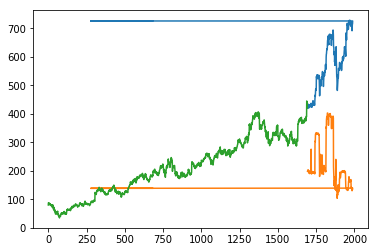

In [137]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['adj-close-AMZN', 'Predictions']])
plt.plot(train['adj-close-AMZN'])

#Linear Regression 

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

374.75207899460753

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


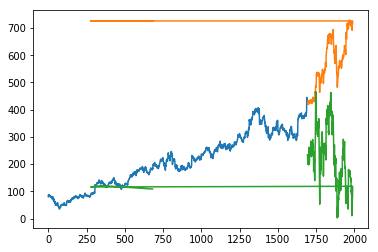

In [142]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = data[train_len:].index
train.index = data[:train_len].index

plt.plot(train['adj-close-AMZN'])
plt.plot(valid[['adj-close-AMZN', 'Predictions']])

# Knn

In [143]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler



#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [144]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

316.62260468460266

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


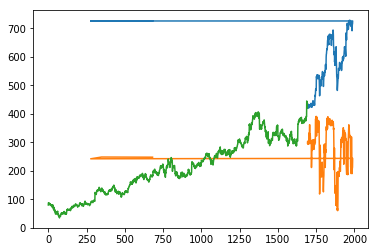

In [145]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['adj-close-AMZN', 'Predictions']])
plt.plot(train['adj-close-AMZN'])

In [ ]:
#Arima

In [146]:
from pyramid.arima import auto_arima

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pyramid'

In [147]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Close'])
for i in range(0,len(data)):
    
    new_data2['Close'][i] = data['adj-close-AMZN'][i]



#creating train and test sets
dataset = new_data2.values

train = dataset[0:train_len,:]
valid = dataset[train_len:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(5,len(train)):
    x_train.append(scaled_data[i-5:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
#predicting values, using past 5 from the train data
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 35s - loss: 0.0026


In [1]:
inputs = new_data2[len(new_data2) - len(valid) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(5,inputs.shape[0]):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

NameError: name 'new_data2' is not defined

In [ ]:
#for plotting
train = new_data2[:train_len]
valid = new_data2[train_len:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])